In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
  value="Click here to toggle on/off the raw code."></form>''')

#### Richards' Equation, transient problem with multiple water retention models

This is a simple horizontal column with two types of soil, through which water is pushed from left to right. 

This demonstrates a transient simulation for Richards' equation, and deals with the upwinding issues needed for pushing water into a dry soil.

NOTE(etc): add the harmonic mean version of this for comparison

Author: Ethan Coon

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf
import column_data
import colors
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the ATS solution
directory = "richards-upwinding.regression.gold"

dat = column_data.column_data(["pressure", "saturation_liquid"],
                              directory=directory, coord=0)

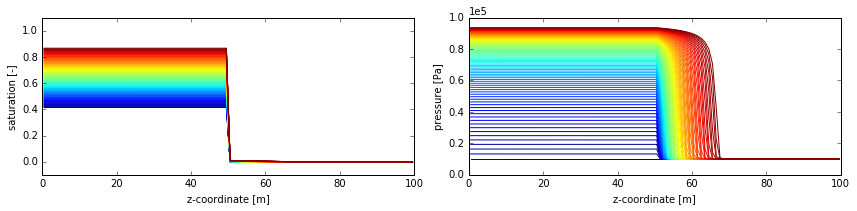

In [3]:
# plot the solution
x = dat[0,0,:]
cm = colors.cm_mapper(0,dat.shape[1]-1) # color the plots as a function of time
fig, axs = column_data.getFigs(False, False)

for i in range(dat.shape[1]):
    axs[1].plot(x, dat[1,i,:], color=cm(i))
    axs[0].plot(x, dat[2,i,:], color=cm(i))

axs[0].set_ylim([-.1,1.1])
axs[0].set_ylabel('saturation [-]')
axs[0].set_xlabel('z-coordinate [m]')
axs[1].set_ylabel('pressure [Pa]')
axs[1].set_xlabel('z-coordinate [m]')
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()